## Определение систематических и случайных погрешностей при измерении удельного сопротивления нихромой проволоки

### 1 Введение

**Цель**: измерить удельное сопротивление проволоки, учитывая систематические и случайные погрешности.

**Оборудование**: линейка, штангенциркуль, микрометр, отрезок проволоки из нихрома, амперметр, вольтметр, источник ЭДС, мост постоянного тока, реостат, провода.

#### 2 Немного теории

Мы считаем, что проволока — это однородный цилиндр, её удельное сопротивление рассчитывается по формуле:

$$\rho = \frac{R \cdot \pi d^2}{4l}$$

где $R$ — сопротивление проволоки, $d$ — её диаметр, $l$ — длина.

Поэтому, чтобы найти удельное сопротивление с имеющимися у нас приборами, нам нужно измерить следующие величины:

- Сопротивление
- Диаметр
- Длина

#### Измерение сопротивления

По закону Ома мы можем найти сопротивление из тока и напряжения:

$$ R = \dfrac{U}{I} $$

Для измерения сопротивления можно использовать две принципиальные схемы:

<img src="circuit_variants.png" alt="Варианты схемы" style="width:600px">

Так как амперметр и вольтметр — не идеальны, значение сопротивления для схемы А:

$$
R_{\tiny{пр}} = R_{\tiny{пр1}}\left(1 + 
\frac{R_{{\tiny{пр1}}}}{R_V}\right)
$$

Для схемы Б:

$$
R_{\tiny{пр}} = R_{\tiny{пр2}}\left(1 - 
\frac{R_A}{R_{\tiny{пр2}}}\right)
$$

Видно, что во второй формуле $R_A \sim R_{\tiny{пр2}}$, т. к. проволока тонкая и ее сопротивление невелико, в  измерениях будет присутствовать существенная **систематическая погрешность**. Поэтому мы проводим измерения на схеме Б.

Для схемы А сопротивление оказывается заниженным, а для схемы Б — завышенным по сравнению с истинным значением.

<img src="image.png" alt="Собранная схема" style="width:600px">

Точнее измерить сопротивление можно с помощью моста Уинстона, который работает по такой схеме:

<img src="bridge.png" alt="Мост Уинстона" style="width:400px">

С помощью моста мы оцениваем точность наших измерений.

<img src="image-1.png" alt="Мост" style="width:600px">

#### Измерение диаметра и длины

Диаметр и длину проволоки мы можем измерить напрямую. Для диаметра целесообразно использовать микрометр, так как эта величина довольно маленькая (даже для штангенциркуля), а для длины проволоки — штангенциркуль.

Диаметр мы измеряем несколько раз в разных местах проволоки, а длину — один раз.

### 2 Измерения и погрешности

#### Длина — штангенциркуль

Мы делаем только одно измерение, поэтому случайная погрешность отсутствует, но есть приборная, равна половине цены деления, т. е. $0.05\ мм$.

#### Диаметр — микрометр

При измерении же микрометром нужно учитывать и приборную и случайную погрешность:

$$
\sigma_\text{приб}=0,005\text{ мм}\;\;\;\;\;\;
$$

$$
\sigma_\text{сл}=\frac{1}{N} \sqrt{\sum_{i=1}^{n}(d_i - \overline{d})^2}
$$

$$
\sigma_{d_\text{м}} = \sqrt{\sigma_\text{приб}^2+\sigma_\text{сл}^2}
$$

#### Сопротивление — вольтметр и амперметр

**Характеристики измерительных приборов**

|               | Вольтметр             | Миллиамперметр           |
|---------------|----------------------|--------------------------|
| Система        | Магнитоэлектрическая | Цифровая                 |
| Класс точности| 0,2                  | ---                      |
| Предел измерений $x_\text{П}$ | 0,6 В | 2 А -- 0,5 А |
| Число делений шкалы $n$ | 150 | --- |
| Цена делений $x_\text{П}/n$ | 4 мВ/дел | --- |
| Чувствительность $n/x_\text{П}$ | 250 дел/В | --- |
| Абсолютная погрешность $\Delta x_\text{М}$ | 2 мВ | 0,06 мА -- 0,6 мА |
| Внутреннее сопротивление прибора | 4000 Ом | 1,2 Ом |



#### 4 Импорты и ввод данных

In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import linregress

import matplotlib.pyplot as plt
import seaborn as sns

from typing import Optional, Tuple

In [32]:
%conda env export > environment.yml


Note: you may need to restart the kernel to use updated packages.


In [33]:
def snake_to_title(col_name: str) -> str:
    return col_name.replace('_', ' ').capitalize()

In [34]:
def kde_boxen_qq(
    data_col: pd.Series,
    title: str,
    figsize: Optional[Tuple[str, str]] = None
    # It's not good practice to "inherit" figsize without actual inheritance or composition
) -> None:

    fig, axes = plt.subplot_mosaic([['up', 'right'],['down', 'right']],
                                    constrained_layout=True, figsize=(10,6),
                                    gridspec_kw={
                                        'height_ratios': (0.3, 0.7),
                                        'width_ratios': (0.6, 0.4)
                                    })
    
    fig.suptitle(title, fontsize='xx-large')

    sns.histplot(data=data_col, ax=axes['down'], kde=True)

    sns.boxenplot(x=data_col, ax=axes['up'])
    axes['up'].set_xlabel('')
    axes['up'].set_xticklabels('')

    sm.qqplot(data_col, fit=True, line='45', alpha=0.2, ax=axes['right'])
    axes['right'].set_title('QQ plot')

    if figsize:
        x, y = figsize
        fig.set_figwidth(x)
        fig.set_figheight(y)

    sns.despine()
    plt.show()

In [35]:
ui_data = pd.read_csv("data.csv")
ui_data.columns = pd.MultiIndex.from_product([[20, 30, 50], ['U', 'I']], names=['l, cm', ''])

ui_data

l, cm   20           30           50        
         U       I    U       I    U       I
0      600  230.94  600  167.77  596  101.20
1      552  211.53  536  150.26  564   95.58
2      480  184.08  500  140.49  512   86.85
3      416  158.45  436  122.52  484   81.90
4      360  136.74  380  106.49  468   78.83
5      324  123.42  340   95.18  428   72.29
6      268  102.13  300   83.69  404   68.54
7      248   91.73  264   73.94  376   63.48
8      220   84.52  232   65.29  352   59.71
9      176   66.90  204   57.32  328   55.51

In [36]:
d_micro_data = pd.Series([0.35] * 10 + [0.36] * 5 + [0.34] * 2)
d_micro_data

0     0.35
1     0.35
2     0.35
3     0.35
4     0.35
5     0.35
6     0.35
7     0.35
8     0.35
9     0.35
10    0.36
11    0.36
12    0.36
13    0.36
14    0.36
15    0.34
16    0.34
dtype: float64

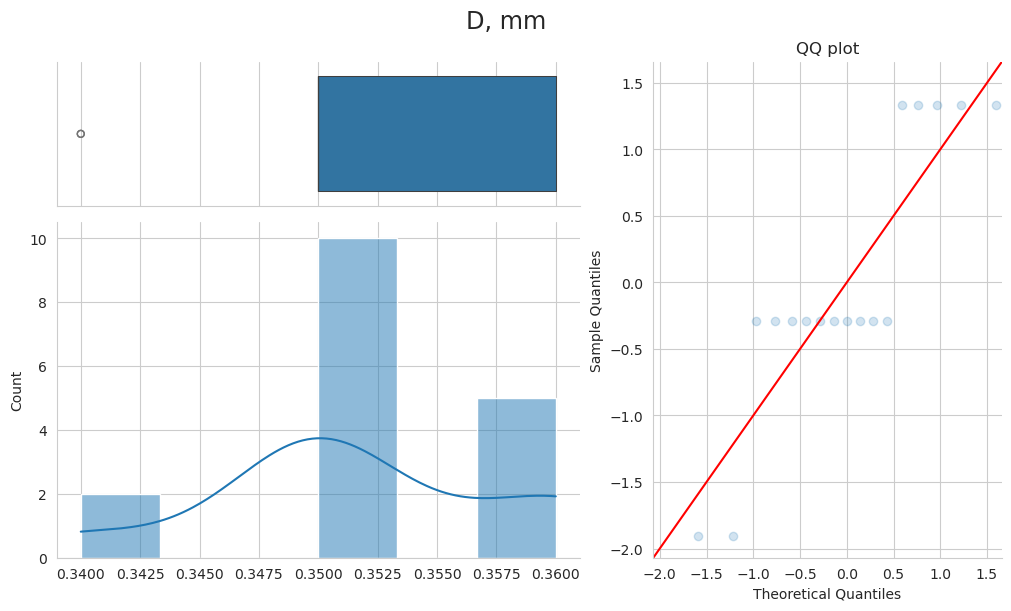

In [37]:
kde_boxen_qq(d_micro_data, 'D, mm')

In [38]:
d_stangen = 0.35
d_stangen

0.35

In [39]:
R_bridge_20 = 2.585
R_bridge_30 = 3.411
R_bridge_50 = 5.788

#### 5 Расчёт значений с погрешностями

In [40]:
d_micro = d_micro_data.mean()

err_d_micro_sist = 0.005
err_d_micro_rand = d_micro.std() / np.sqrt(len(d_micro_data))
err_d_micro = np.sqrt(err_d_micro_sist**2 + err_d_micro_rand**2)

s_stangen = np.pi * d_stangen ** 2 / 4
s_micro = np.pi * d_micro ** 2 / 4
err_s_micro = 2 * s_micro * err_d_micro / d_micro

print(f"d_micro = {d_micro:.3} ± {err_d_micro} mm")
print(f"s_micro = {s_micro:.2} ± {err_s_micro:.1} mm^2")

d_micro = 0.352 ± 0.005 mm
s_micro = 0.097 ± 0.003 mm^2


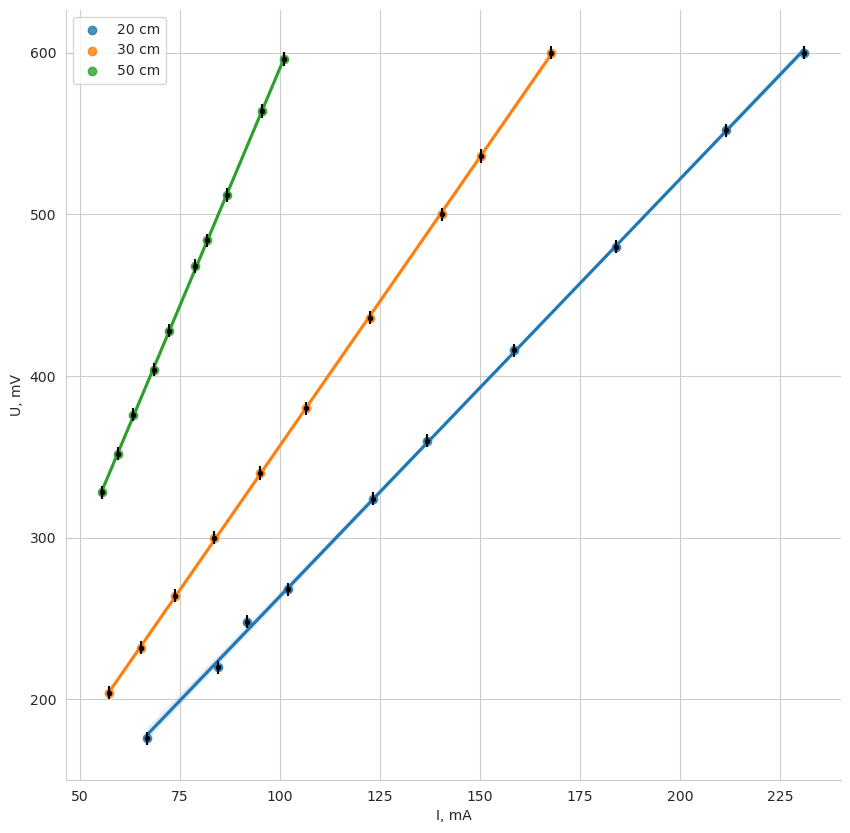

In [41]:
# plot U from I with dots and linear regression using seaborn

# minimalistic style without background
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 10))

sns.regplot(x=ui_data[20, 'I'], y=ui_data[20, 'U'], ax=ax, label='20 cm')
sns.regplot(x=ui_data[30, 'I'], y=ui_data[30, 'U'], ax=ax, label='30 cm')
sns.regplot(x=ui_data[50, 'I'], y=ui_data[50, 'U'], ax=ax, label='50 cm')

# calculate errors for each point
eps_x = 0.2 / 100
eps_y = 0.2 / 100
X = np.array([ui_data[20, 'I'], ui_data[30, 'I'], ui_data[50, 'I']])
Y = np.array([ui_data[20, 'U'], ui_data[30, 'U'], ui_data[50, 'U']])
X_err = eps_x * X
Y_err = np.sqrt((eps_y * Y) ** 2 + 4 ** 2)

# add error bars from np arrays
for point in range(len(X)):
    ax.errorbar(X[point], Y[point], xerr=X_err[point], yerr=Y_err[point], fmt='.', color='black')


ax.set_xlabel('I, mA')
ax.set_ylabel('U, mV')
ax.legend()

plt.savefig('plot.png', dpi=300)

sns.despine()
plt.show()

Расчёт удельного сопротивления с помощью схемы

In [49]:
# calculate resistance and rho

for U_col, I_col, L in zip(['U', 'U', 'U'], ['I', 'I', 'I'], [20, 30, 50]):

    U = ui_data[L, U_col]
    I = ui_data[L, I_col]

    # calculate resistance using linear regression
    slope, intercept, r_value, p_value, std_err = linregress(I, U)
    R = slope
    err_R = std_err

    print(f"L = {L} cm")
    print(f"R = {R:.3} ± {err_R:.3} Ω")

    # convert into microOhms
    R *= 1000

    # calculate rho
    rho = R * s_micro / L
    err_L = 0.05
    err_rho = rho * np.sqrt((err_R / R) ** 2 + (err_s_micro / s_micro) ** 2 + (err_L / L) ** 2)

    print(f"ρ = {rho:.3} ± {err_rho:.3} μΩ * mm^2 / cm")

    print('-'*10)

L = 20 cm
R = 2.58 ± 0.0163 Ω
ρ = 12.5 ± 0.358 μΩ * mm^2 / cm
----------
L = 30 cm
R = 3.57 ± 0.00883 Ω
ρ = 11.6 ± 0.329 μΩ * mm^2 / cm
----------
L = 50 cm
R = 5.88 ± 0.0265 Ω
ρ = 11.4 ± 0.325 μΩ * mm^2 / cm
----------


Расчёт удельного сопротивления с помощью моста

In [52]:
for R, L in ((R_bridge_20, 20), (R_bridge_30, 30), (R_bridge_50, 50)):
    R *= 1000
    rho = R * s_stangen / L
    err_rho = rho * np.sqrt((err_R / R) ** 2 + (err_s_micro / s_micro) ** 2 + (err_L / L) ** 2)
    print(f"ρ = {rho:.3} ± {err_rho:.3} μΩ * mm^2 / cm")

ρ = 12.4 ± 0.355 μΩ * mm^2 / cm
ρ = 10.9 ± 0.312 μΩ * mm^2 / cm
ρ = 11.1 ± 0.317 μΩ * mm^2 / cm


#### 6 Выводы

- Значения, определенные с помощью моста и с помощью схемы сошлись, УРА! (ошибки пересекаются)
- С мостом получилось чуть-чуть точнее
- Однако бОльший вклад в погрешность вносит измерение диаметра с помощью микрометра, поэтому мост незначительно увеличивает точность измерения удельного сопротивления